# Pandas

Import pandas module and some oother stuff.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
%matplotlib inline

Read the data from an Excel spreadsheet, and show it.

In [3]:
data = pd.read_excel('data/patients.xlsx')
data

,patient,dose,date,temperature
0,1,0.0,2012-10-02 10:00:00,38.3
1,1,2.0,2012-10-02 11:00:00,38.5
2,1,2.0,2012-10-02 12:00:00,38.1
3,1,2.0,2012-10-02 13:00:00,37.3
4,1,0.0,2012-10-02 14:00:00,37.5
5,1,0.0,2012-10-02 15:00:00,37.1
6,1,0.0,2012-10-02 16:00:00,36.8
7,2,0.0,2012-10-02 10:00:00,39.3
8,2,5.0,2012-10-02 11:00:00,39.4
9,2,5.0,2012-10-02 12:00:00,38.1


This format is somewhat unwieldy, represent as time series data by using the date as an index, and the patient ID as column, using a pivot table.

In [4]:
timeseries = data.pivot_table(index='date', columns=['patient'])
timeseries

dose                temperature                  
patient                1    2    3    4           1     2     3     4
date                                                                 
2012-10-02 10:00:00  0.0  0.0  0.0  0.0        38.3  39.3  37.9  38.1
2012-10-02 11:00:00  2.0  5.0  2.0  5.0        38.5  39.4  39.5  37.2
2012-10-02 12:00:00  2.0  5.0  5.0  5.0        38.1  38.1  38.3  36.1
2012-10-02 13:00:00  2.0  5.0  2.0  0.0        37.3  37.3   NaN  35.9
2012-10-02 14:00:00  0.0  0.0  2.0  NaN        37.5  36.8  37.7  36.3
2012-10-02 15:00:00  0.0  0.0  2.0  0.0        37.1  36.8  37.1  36.6
2012-10-02 16:00:00  0.0  0.0  0.0  0.0        36.8  36.8  36.7  36.7

Show the temmperatures for all patients, note the missing value for 3.

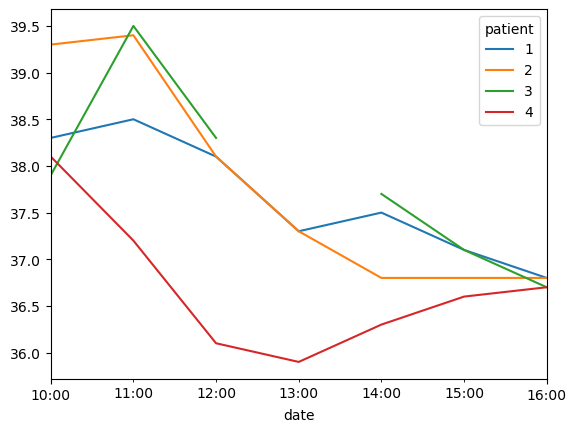

In [5]:
timeseries['temperature'].plot();

Just show the plot for patient 2.

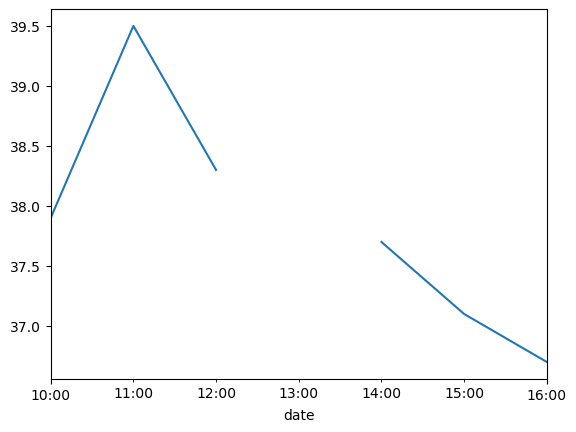

In [6]:
timeseries['temperature', 3].plot();

Add a column with the average temperature over all patients per row. Note that NaNs are not taken into account, so one mean value is computed over three, rather than four temperature values.

In [7]:
timeseries['avg_temperature'] = timeseries['temperature'].mean(axis=1)
timeseries

dose                temperature                    \
patient                1    2    3    4           1     2     3     4   
date                                                                    
2012-10-02 10:00:00  0.0  0.0  0.0  0.0        38.3  39.3  37.9  38.1   
2012-10-02 11:00:00  2.0  5.0  2.0  5.0        38.5  39.4  39.5  37.2   
2012-10-02 12:00:00  2.0  5.0  5.0  5.0        38.1  38.1  38.3  36.1   
2012-10-02 13:00:00  2.0  5.0  2.0  0.0        37.3  37.3   NaN  35.9   
2012-10-02 14:00:00  0.0  0.0  2.0  NaN        37.5  36.8  37.7  36.3   
2012-10-02 15:00:00  0.0  0.0  2.0  0.0        37.1  36.8  37.1  36.6   
2012-10-02 16:00:00  0.0  0.0  0.0  0.0        36.8  36.8  36.7  36.7   

                    avg_temperature  
patient                              
date                                 
2012-10-02 10:00:00       38.400000  
2012-10-02 11:00:00       38.650000  
2012-10-02 12:00:00       37.650000  
2012-10-02 13:00:00       36.833333  
2012-10-02 14:00:00       37.075000  
2012-10-02 15:00:00       36.900000  
2012-10-02 16:00:00       36.750000

Show the relative change of the average temperature as a function of time.

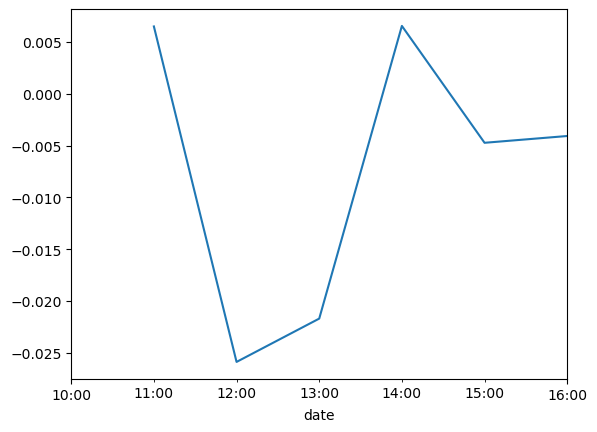

In [8]:
timeseries['avg_temperature'].pct_change().plot();

Missing values are annoying, so replace the NaN for patient 3' temperature by values interpolated between the values of the rows above and below.

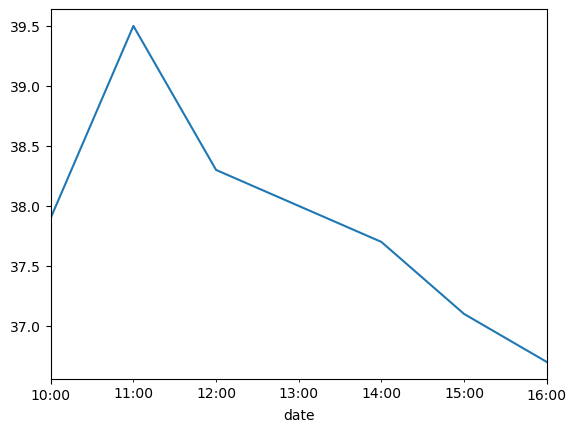

In [9]:
interpolated = timeseries['temperature', 3].interpolate()
interpolated.plot();

Replace all NaNs by interpolated values, so for both dose and temperature.

In [10]:
timeseries.interpolate(inplace=True)
timeseries

dose                temperature                    \
patient                1    2    3    4           1     2     3     4   
date                                                                    
2012-10-02 10:00:00  0.0  0.0  0.0  0.0        38.3  39.3  37.9  38.1   
2012-10-02 11:00:00  2.0  5.0  2.0  5.0        38.5  39.4  39.5  37.2   
2012-10-02 12:00:00  2.0  5.0  5.0  5.0        38.1  38.1  38.3  36.1   
2012-10-02 13:00:00  2.0  5.0  2.0  0.0        37.3  37.3  38.0  35.9   
2012-10-02 14:00:00  0.0  0.0  2.0  0.0        37.5  36.8  37.7  36.3   
2012-10-02 15:00:00  0.0  0.0  2.0  0.0        37.1  36.8  37.1  36.6   
2012-10-02 16:00:00  0.0  0.0  0.0  0.0        36.8  36.8  36.7  36.7   

                    avg_temperature  
patient                              
date                                 
2012-10-02 10:00:00       38.400000  
2012-10-02 11:00:00       38.650000  
2012-10-02 12:00:00       37.650000  
2012-10-02 13:00:00       36.833333  
2012-10-02 14:00:00       37.075000  
2012-10-02 15:00:00       36.900000  
2012-10-02 16:00:00       36.750000

Note that the average temperature has not been updated, it should be recomputed to account for the interpolated tempearture value. Plot the resulting average temperature as a function of time.

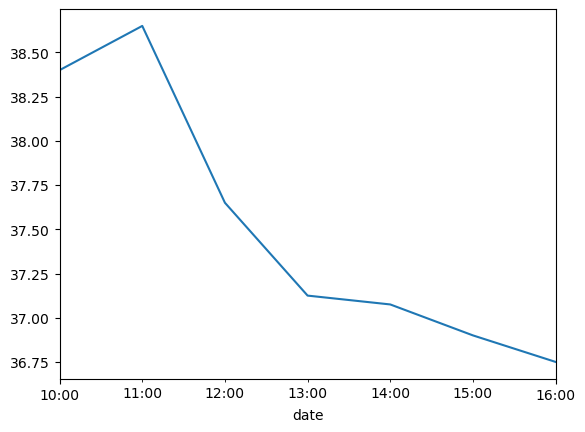

In [11]:
timeseries['avg_temperature'] = timeseries['temperature'].mean(axis=1)
timeseries['avg_temperature'].plot();

The cummulutative dose is more interesting than the dose administered at some point in time, so compute it.

In [12]:
timeseries['dose'].cumsum()

patient,1,2,3,4
date,,,,
2012-10-02 10:00:00,0.0,0.0,0.0,0.0
2012-10-02 11:00:00,2.0,5.0,2.0,5.0
2012-10-02 12:00:00,4.0,10.0,7.0,10.0
2012-10-02 13:00:00,6.0,15.0,9.0,10.0
2012-10-02 14:00:00,6.0,15.0,11.0,10.0
2012-10-02 15:00:00,6.0,15.0,13.0,10.0
2012-10-02 16:00:00,6.0,15.0,13.0,10.0


Add columns representing the cummulative dose of each patient.

In [13]:
for patient_id in timeseries['dose'].columns:
    timeseries['cum_dose', patient_id] = timeseries['dose', patient_id].cumsum()
timeseries

dose                temperature                    \
patient                1    2    3    4           1     2     3     4   
date                                                                    
2012-10-02 10:00:00  0.0  0.0  0.0  0.0        38.3  39.3  37.9  38.1   
2012-10-02 11:00:00  2.0  5.0  2.0  5.0        38.5  39.4  39.5  37.2   
2012-10-02 12:00:00  2.0  5.0  5.0  5.0        38.1  38.1  38.3  36.1   
2012-10-02 13:00:00  2.0  5.0  2.0  0.0        37.3  37.3  38.0  35.9   
2012-10-02 14:00:00  0.0  0.0  2.0  0.0        37.5  36.8  37.7  36.3   
2012-10-02 15:00:00  0.0  0.0  2.0  0.0        37.1  36.8  37.1  36.6   
2012-10-02 16:00:00  0.0  0.0  0.0  0.0        36.8  36.8  36.7  36.7   

                    avg_temperature cum_dose                    
patient                                    1     2     3     4  
date                                                            
2012-10-02 10:00:00          38.400      0.0   0.0   0.0   0.0  
2012-10-02 11:00:00          38.650      2.0   5.0   2.0   5.0  
2012-10-02 12:00:00          37.650      4.0  10.0   7.0  10.0  
2012-10-02 13:00:00          37.125      6.0  15.0   9.0  10.0  
2012-10-02 14:00:00          37.075      6.0  15.0  11.0  10.0  
2012-10-02 15:00:00          36.900      6.0  15.0  13.0  10.0  
2012-10-02 16:00:00          36.750      6.0  15.0  13.0  10.0

Gene expression data is available for these patients, and it is stored on an HTML page (so much for privacy). The column names, i.e., the patient IDs are string, but to be consistent, they are converted to integers.

In [15]:
genes_data = pd.read_html('data/genes.html', index_col=0, header=0)
genes = genes_data[0]
genes.columns = [int(x) for x in genes.columns]
genes

,1,2,3,4
FXDG,0.010199,0.042988,0.831946,-0.023656
VTUR,0.466012,0.494679,0.806661,0.518115
OVAH,0.783847,0.754150,0.208352,0.826368
AKSE,0.922433,0.929716,0.662824,0.959443
SJNN,0.325089,0.302198,0.522847,0.356346
LVKM,0.554702,0.531044,0.138988,0.600229
GBDZ,0.138237,0.175223,0.454214,0.166761
FVEW,0.541489,0.586018,0.823917,0.529811
ZNYZ,0.182592,0.180604,0.187386,0.117254
GTKJ,0.309138,0.261196,0.219769,0.276605


Create a scatter matrix plot to see correlations.

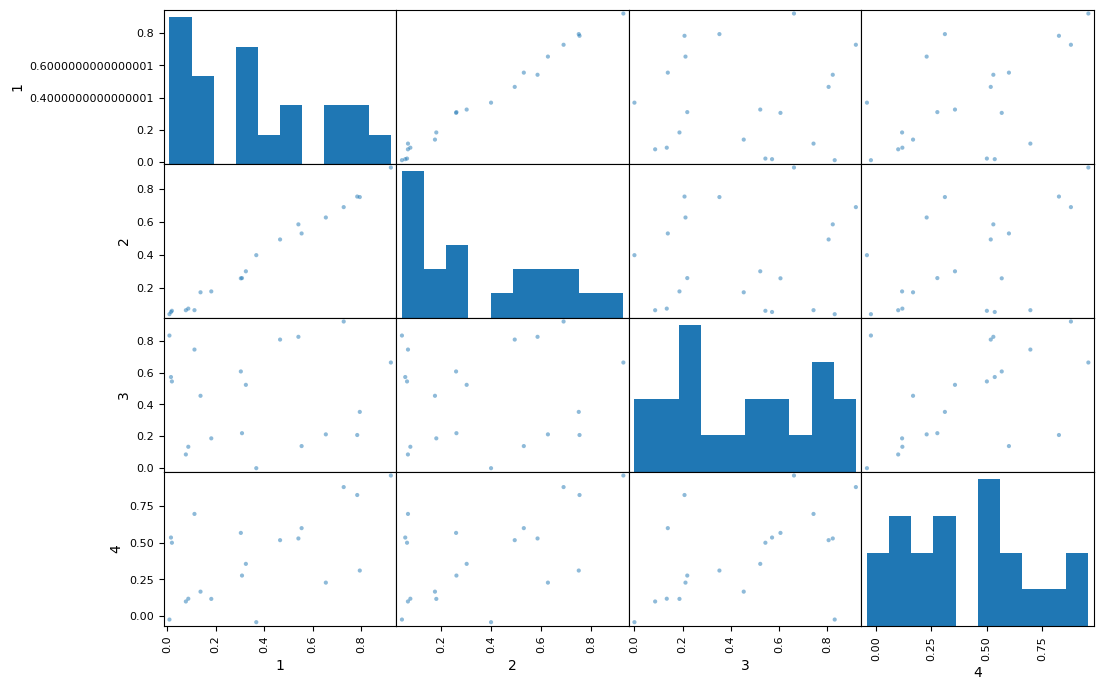

In [16]:
pd.plotting.scatter_matrix(genes, figsize=(12, 8));

In [17]:
genes.columns = [int(x) for x in genes.columns]

Compute Pearson R correlation coefficients.

Compute all correlations and p-values and store them in dataframes.

In [18]:
indices = list(genes.columns)
genes_corr = pd.DataFrame(index=indices, columns=indices)
genes_p_value = pd.DataFrame(index=indices, columns=indices)
for id1 in genes.columns:
    for id2 in genes.columns:
        genes_corr[id1][id2], genes_p_value[id1][id2] = stats.pearsonr(genes[id1], genes[id2])

In [19]:
genes_corr

,1,2,3,4
1,1,0.993652,0.0456766,0.547455
2,0.993652,1,0.0728375,0.537331
3,0.0456766,0.0728375,1,0.485027
4,0.547455,0.537331,0.485027,1


In [19]:
genes_p_value

,1,2,3,4
1,0.0,0.0,0.848355,0.012473
2,0.0,0.0,0.760236,0.014556
3,0.848355,0.760236,0.0,0.030188
4,0.012473,0.014556,0.030188,0.0


In [20]:
timeseries

dose                temperature                    \
patient                1    2    3    4           1     2     3     4   
date                                                                    
2012-10-02 10:00:00  0.0  0.0  0.0  0.0        38.3  39.3  37.9  38.1   
2012-10-02 11:00:00  2.0  5.0  2.0  5.0        38.5  39.4  39.5  37.2   
2012-10-02 12:00:00  2.0  5.0  5.0  5.0        38.1  38.1  38.3  36.1   
2012-10-02 13:00:00  2.0  5.0  2.0  0.0        37.3  37.3  38.0  35.9   
2012-10-02 14:00:00  0.0  0.0  2.0  0.0        37.5  36.8  37.7  36.3   
2012-10-02 15:00:00  0.0  0.0  2.0  0.0        37.1  36.8  37.1  36.6   
2012-10-02 16:00:00  0.0  0.0  0.0  0.0        36.8  36.8  36.7  36.7   

                    avg_temperature cum_dose                    
patient                                    1     2     3     4  
date                                                            
2012-10-02 10:00:00          38.400      0.0   0.0   0.0   0.0  
2012-10-02 11:00:00          38.650      2.0   5.0   2.0   5.0  
2012-10-02 12:00:00          37.650      4.0  10.0   7.0  10.0  
2012-10-02 13:00:00          37.125      6.0  15.0   9.0  10.0  
2012-10-02 14:00:00          37.075      6.0  15.0  11.0  10.0  
2012-10-02 15:00:00          36.900      6.0  15.0  13.0  10.0  
2012-10-02 16:00:00          36.750      6.0  15.0  13.0  10.0

Another example of using pivot tables: per patient, compute the total dose, and the maximum temperature.

In [21]:
data.pivot_table(index=['patient'], values=['dose', 'temperature'],
                 aggfunc={'dose': 'sum', 'temperature': 'max'})

,dose,temperature
patient,,
1,6.0,38.5
2,15.0,39.4
3,13.0,39.5
4,10.0,38.1


Find all patients that had a temperature above 39.0 and when that occurred.

In [22]:
data.query('temperature > 39.0').loc[:, ['patient', 'date', 'temperature']]

,patient,date,temperature
7,2,2012-10-02 10:00:00,39.3
8,2,2012-10-02 11:00:00,39.4
15,3,2012-10-02 11:00:00,39.5
